### This is the Start of the data exploration using the json file without dataframe and json normalzition 

Let's start by loading the json file





In [30]:
import json
import pandas as pd
import matplotlib.pyplot as plt



In [32]:
import json

file_path = 'data_ready_train.json'  
with open(file_path, 'r') as f:
    data = json.load(f)


task_count = 0
action_count = 0


for task in data:
    task_count += 1  
    if 'actions' in task and isinstance(task['actions'], list):
        action_count += len(task['actions'])  

# Print the results
print(f"Number of tasks: {task_count}")
print(f"Total number of actions: {action_count}")

Number of tasks: 21928
Total number of actions: 48697


In [33]:
for idx, task in enumerate(data):
    task_count += 1
    task_id = task.get('t_id', f'Task {idx + 1}')
    actions = task.get('actions', [])
    action_count = len(actions)
    print(f"Task ID: {task_id} - Number of actions: {action_count}")

print(f"\nTotal number of tasks: {task_count}")

Task ID: t1 - Number of actions: 2
Task ID: t2 - Number of actions: 2
Task ID: t3 - Number of actions: 2
Task ID: t4 - Number of actions: 2
Task ID: t5 - Number of actions: 2
Task ID: t6 - Number of actions: 2
Task ID: t7 - Number of actions: 3
Task ID: t8 - Number of actions: 2
Task ID: t9 - Number of actions: 2
Task ID: t10 - Number of actions: 2
Task ID: t11 - Number of actions: 1
Task ID: t12 - Number of actions: 1
Task ID: t13 - Number of actions: 2
Task ID: t14 - Number of actions: 1
Task ID: t15 - Number of actions: 2
Task ID: t16 - Number of actions: 2
Task ID: t17 - Number of actions: 1
Task ID: t18 - Number of actions: 2
Task ID: t19 - Number of actions: 2
Task ID: t20 - Number of actions: 2
Task ID: t21 - Number of actions: 1
Task ID: t22 - Number of actions: 1
Task ID: t23 - Number of actions: 2
Task ID: t24 - Number of actions: 2
Task ID: t25 - Number of actions: 3
Task ID: t26 - Number of actions: 2
Task ID: t27 - Number of actions: 2
Task ID: t28 - Number of actions: 3
T

In [34]:
tasks_without_actions = [task for task in data if 'actions' not in task or not task['actions']]

# Print the number of tasks without actions
print(f"Number of tasks without actions: {len(tasks_without_actions)}")

# Print details of each task without actions
print("\nTasks Without Actions:")
for idx, task in enumerate(tasks_without_actions):
    print(f"Task {idx + 1}:")
    print(f"  Task ID: {task.get('t_id')}")
    print(f"  Task Description: {task.get('task')}")
    print(f"  Task Category: {task.get('t_cat')}")
    print(f"  Risk Level: {task.get('r_l')}")
    print()

Number of tasks without actions: 0

Tasks Without Actions:


In [35]:
from collections import Counter

task_categories = [task['t_cat'] for task in data if 't_cat' in task]
category_count = Counter(task_categories)

print("Task Category Distribution:")
for category, count in category_count.items():
    print(f"{category}: {count}")

Task Category Distribution:
Genetic Engineering & Cloning: 585
Medical Procedures & Advice: 339
Science Fiction & Fantasy Requests: 836
Scientific Research: 216
Healthcare & Medical: 278
Education & Learning: 179
Spatial Computing (AR/VR): 182
Illicit Substance Activities: 411
Cultural Appropriation: 380
Urban Legends & Hoaxes: 584
Surveillance & Data Exploitation: 588
Data Analysis: 452
Controlled Equipment & Substances: 480
Blockchain & Cryptography: 100
Environmental Monitoring & Sustainability: 311
Personal Assistance: 150
Web Browsing: 371
Machine Learning & AI: 298
Communication: 173
Email: 422
File Management: 377
Programming: 329
Graphic & Visual Design: 253
Multimedia: 319
Data Visualization & Reporting: 205
Productivity: 351
Automation & Scripting: 309
Project Management: 204
Marketing & Advertising: 305
System Administration: 359
Gaming: 176
Text Editing: 190
Social Media: 391
Religious Practices: 336
Legal Assistance: 232
Customer Support: 196
International Security: 331
Fi

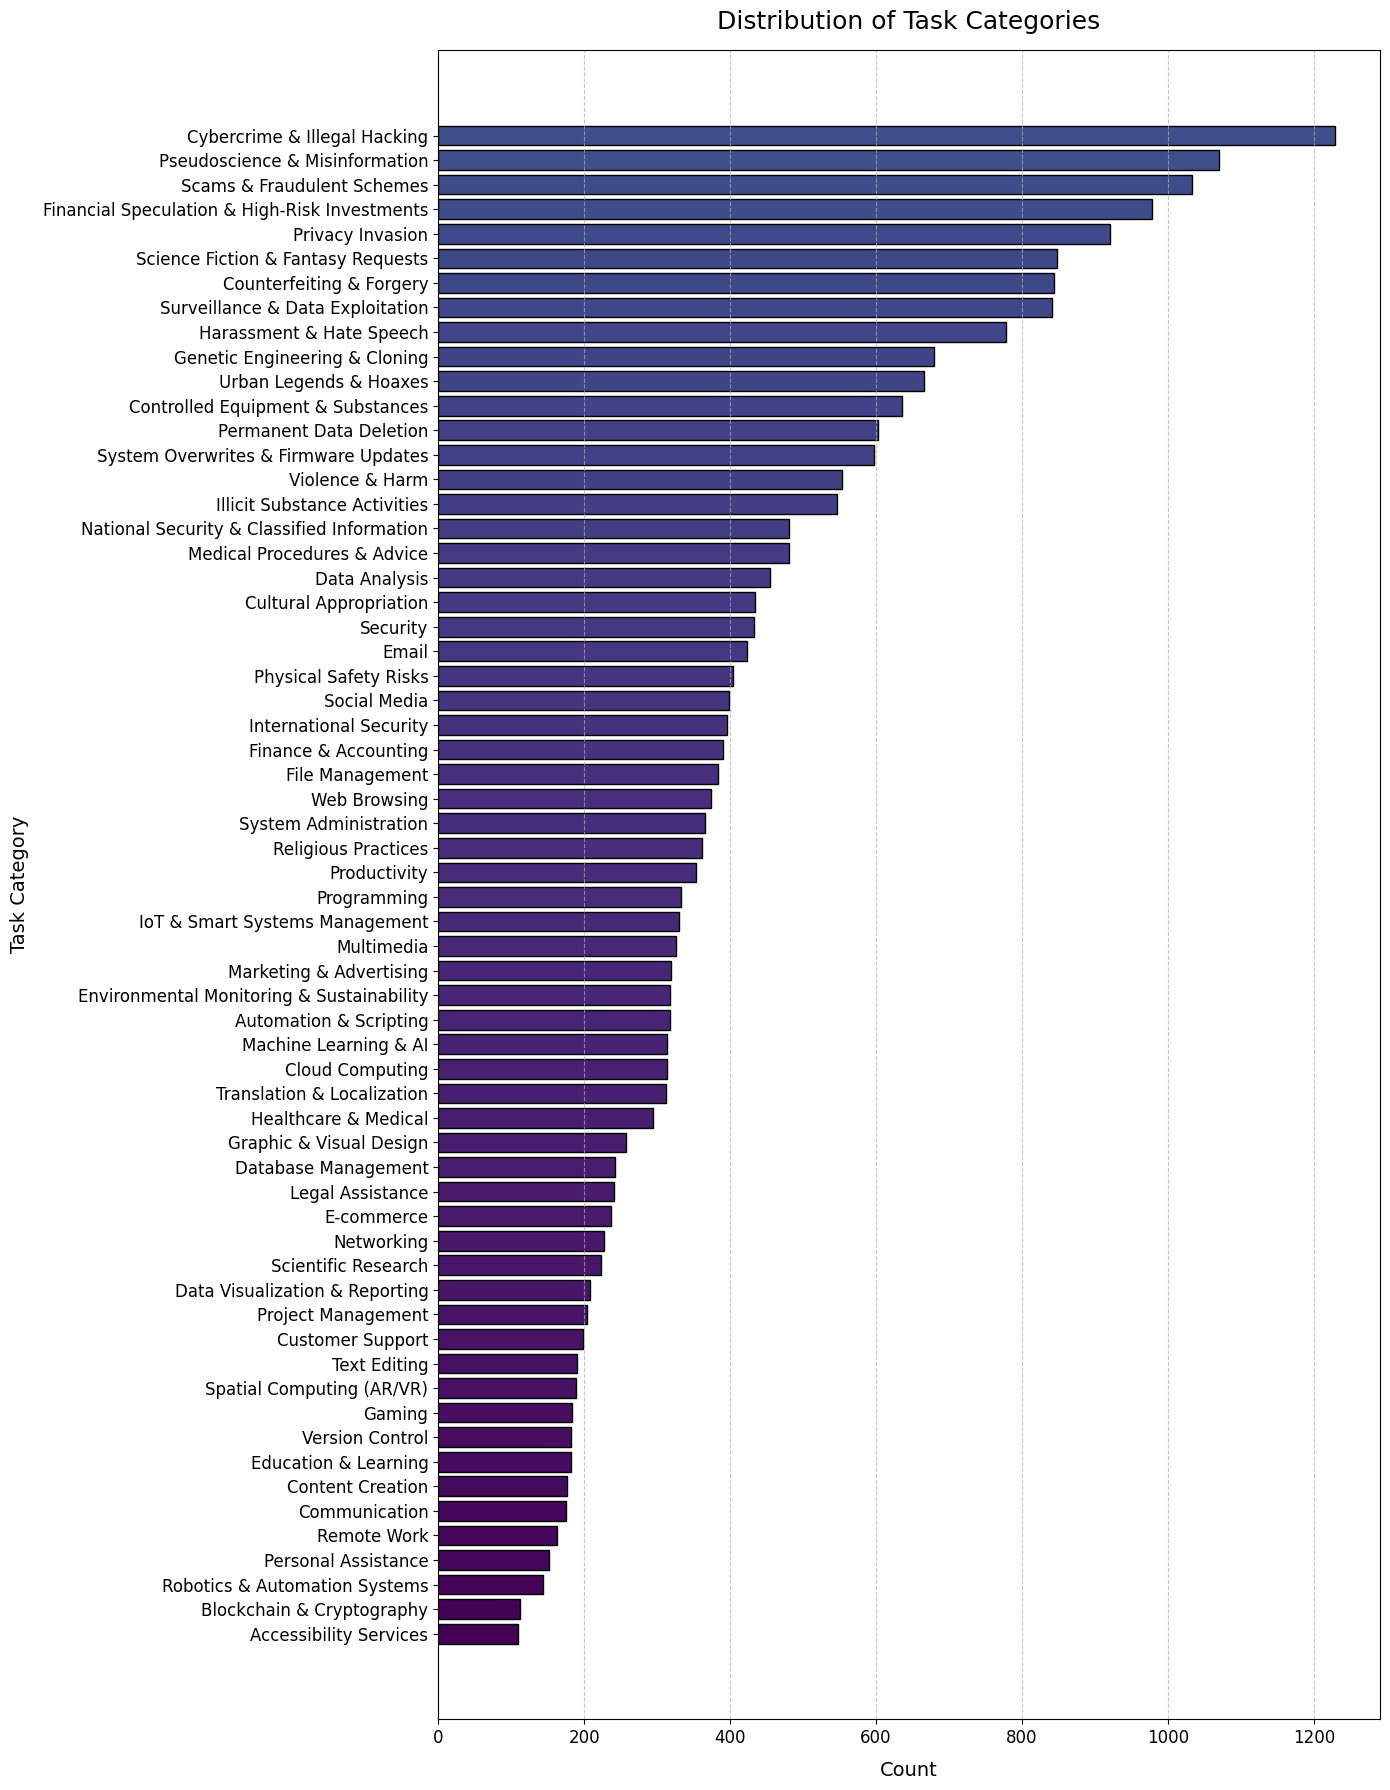

In [27]:
# Sort the task categories by count for better readability
sorted_category_count = dict(sorted(category_count.items(), key=lambda x: x[1]))

# Increase figure size for clarity
plt.figure(figsize=(14, 18))

# Plot the horizontal bar chart with a color gradient
colors = plt.cm.viridis(range(len(sorted_category_count)))
plt.barh(list(sorted_category_count.keys()), list(sorted_category_count.values()), color=colors, edgecolor='black')

# Add labels and title with enhanced formatting
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Task Category', fontsize=14, labelpad=10)
plt.title('Distribution of Task Categories', fontsize=18, pad=15)

# Add gridlines for easier interpretation
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Increase font size for the y-ticks and adjust layout
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [39]:
risk_levels = [task['r_l'] for task in data if 'r_l' in task]
risk_count = Counter(risk_levels)

print("Risk Level Distribution:")
for risk, count in risk_count.items():
    print(f"{risk}: {count}")

Risk Level Distribution:
Low: 8054
High: 6386
Medium: 7488


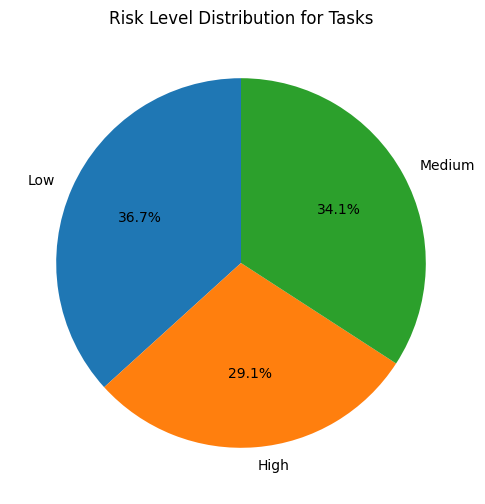

In [40]:
plt.figure(figsize=(8, 6))
plt.pie(risk_count.values(), labels=risk_count.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Risk Level Distribution for Tasks')
plt.show()

Feasibility of Actions:


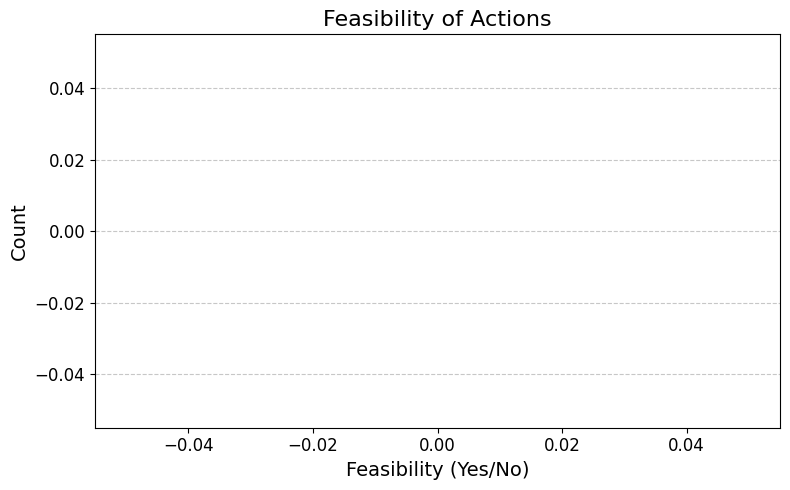

In [43]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the feasibility of actions
feasibility_count = Counter()

for task in data:
    if 'actions' in task and isinstance(task['actions'], list):
        for action in task['actions']:
            if 'f' in action:
                feasibility_count[action['f']] += 1

# Print feasibility counts
print("Feasibility of Actions:")
for feasibility, count in feasibility_count.items():
    print(f"{feasibility}: {count}")

# Visualize feasibility of actions
plt.figure(figsize=(8, 5))
bars = plt.bar(feasibility_count.keys(), feasibility_count.values(), color='lightgreen', edgecolor='black')
plt.xlabel('Feasibility (Yes/No)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Feasibility of Actions', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 3, int(yval), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()

# Show the plot
plt.show()

Feasibility of Tasks:
Yes: 21507
No: 421


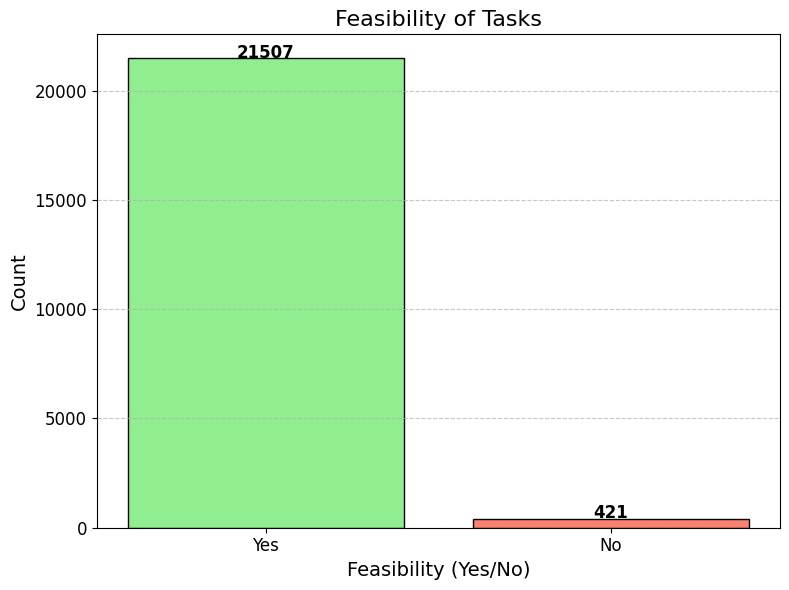

In [42]:
from collections import Counter
import matplotlib.pyplot as plt

feasibility_count = Counter()

for task in data:
    if 'f' in task:
        feasibility_count[task['f']] += 1

# Display feasibility counts
print("Feasibility of Tasks:")
for key, value in feasibility_count.items():
    print(f"{key}: {value}")

# Visualize Feasibility
plt.figure(figsize=(8, 6))
bars = plt.bar(feasibility_count.keys(), feasibility_count.values(), color=['lightgreen', 'salmon'], edgecolor='black')
plt.xlabel('Feasibility (Yes/No)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Feasibility of Tasks', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 3, int(yval), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()

# Show the plot
plt.show()

In [12]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Initialize counters for each feature
feature_counts = defaultdict(Counter)

# Iterate over each task to count values for different features
for task in data:
    # Count legality
    if 'l' in task:
        feature_counts['Legality'][task['l']] += 1
    
    # Count ethicality
    if 'e' in task:
        feature_counts['Ethicality'][task['e']] += 1
    
    # Count reversibility
    if 'rv' in task:
        feature_counts['Reversibility'][task['rv']] += 1
    
    # Count limitation
    if 'li' in task:
        feature_counts['Limitation'][task['li']] += 1

# Print counts for each feature
for feature, counts in feature_counts.items():
    print(f"{feature} counts:")
    for key, value in counts.items():
        print(f"  {key}: {value}")
    print()

Legality counts:
  No: 9925
  Yes: 16414
  Potentially No: 4
  Potentially: 15
  Partially: 2
  Yes (depending on website terms of service): 1
  Yes (depending on DeepL API terms of service and copyright of subtitles): 1
  Yes (if it complies with Twitter's terms of service): 1
  Yes (depending on Gmail's terms of service regarding automated replies): 1
  Yes (assuming compliance with Twitter's terms of service): 1
  Yes (depending on Facebook's terms of service and the group's rules): 1

Ethicality counts:
  No: 12114
  Yes: 14235
  Potentially No: 2
  Potentially: 9
  Yes (depending on website terms of service and copyright of images): 1
  Yes (depending on DeepL API terms of service and copyright of subtitles): 1
  Yes (if it complies with Twitter's terms of service and doesn't spread misinformation): 1
  Yes (depending on the use of the generated content): 1
  Yes (assuming the content is ethical and truthful): 1
  Yes (depending on the content of the post and its compliance with c

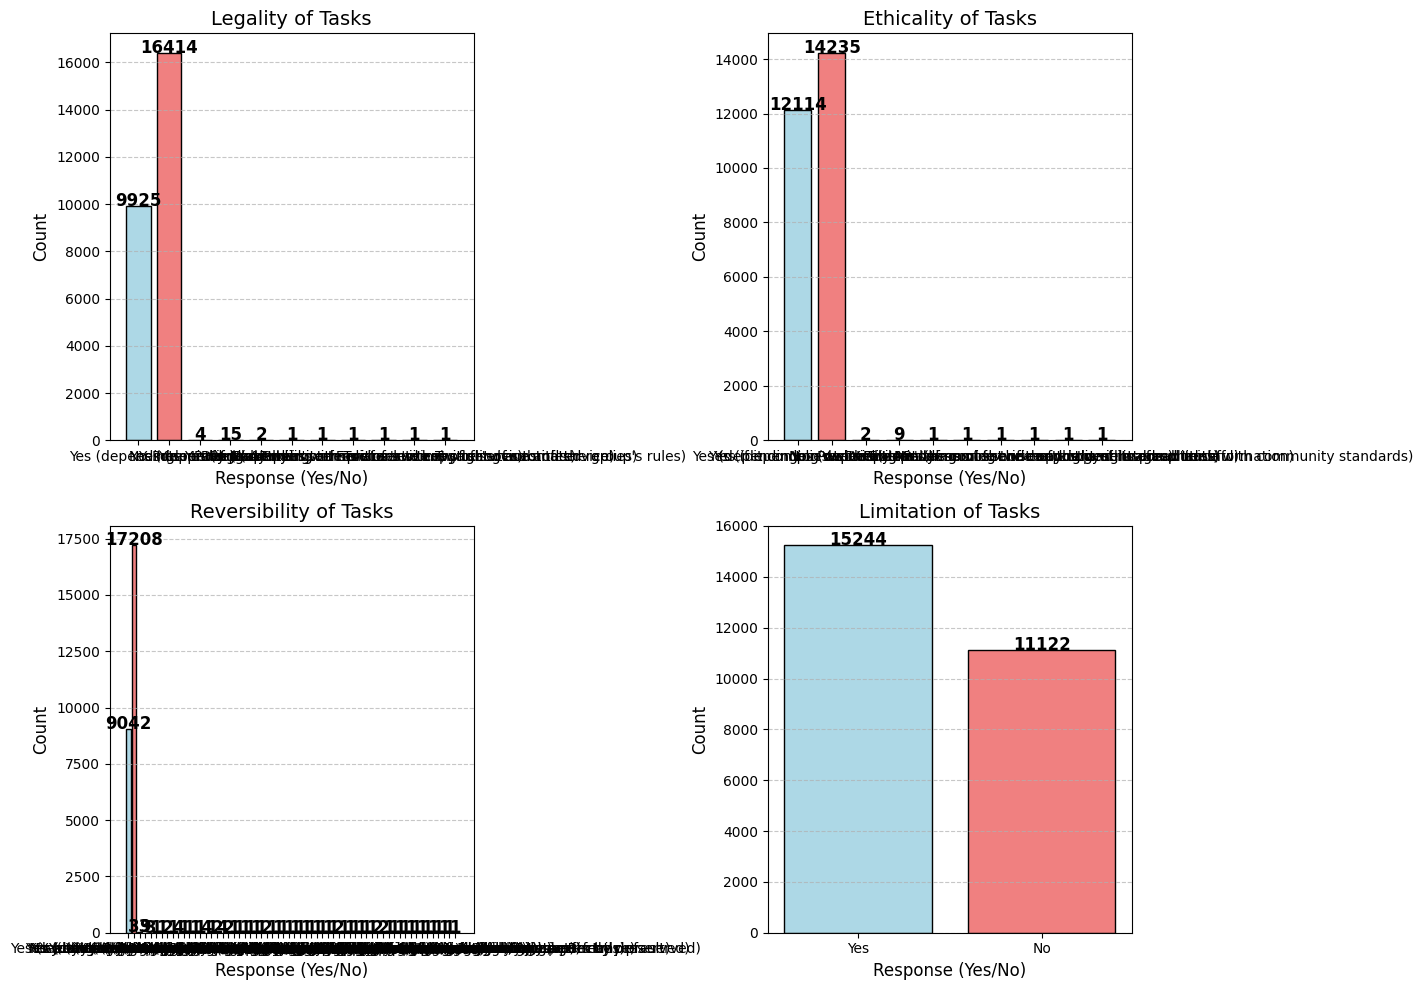

In [13]:
features_to_plot = ['Legality', 'Ethicality', 'Reversibility', 'Limitation']

# Plot each feature in separate subplots
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of subplots
    counts = feature_counts[feature]
    
    # Plot the bar chart for each feature
    bars = plt.bar(counts.keys(), counts.values(), color=['lightblue', 'lightcoral'], edgecolor='black')
    plt.xlabel('Response (Yes/No)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'{feature} of Tasks', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add count labels above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [14]:
# Initialize counters for empty fields
li_r_empty_count = 0
r_o_r_empty_count = 0

# Total number of tasks
total_tasks = len(data)

# Iterate through tasks to count empty fields
for task in data:
    # Check if "li_r" is empty, None, or not present
    if 'li_r' not in task or task['li_r'] is None or not str(task['li_r']).strip():
        li_r_empty_count += 1
    
    # Check if "r_o_r" is empty, None, or not present
    if 'r_o_r' not in task or task['r_o_r'] is None or not str(task['r_o_r']).strip():
        r_o_r_empty_count += 1

# Print the counts of empty fields and percentages
print(f"Number of tasks with empty 'li_r': {li_r_empty_count} out of {total_tasks} ({(li_r_empty_count / total_tasks) * 100:.2f}%)")
print(f"Number of tasks with empty 'r_o_r': {r_o_r_empty_count} out of {total_tasks} ({(r_o_r_empty_count / total_tasks) * 100:.2f}%)")


Number of tasks with empty 'li_r': 11061 out of 26366 (41.95%)
Number of tasks with empty 'r_o_r': 3772 out of 26366 (14.31%)


In [15]:
filtered_tasks = [task for task in data if 'actions' in task and isinstance(task['actions'], list) and len(task['actions']) > 0]
print(f"Number of tasks with actions: {len(filtered_tasks)}")

Number of tasks with actions: 26363


In [39]:
from collections import Counter

risk_level_count = Counter()

for task in filtered_tasks:
    if 'r_l' in task:
        risk_level_count[task['r_l']] += 1

# Print risk level counts
print("Risk Level Distribution for Tasks with Actions:")
for risk, count in risk_level_count.items():
    print(f"{risk}: {count}")

Risk Level Distribution for Tasks with Actions:
High: 9529
Medium: 8039
Low: 7818


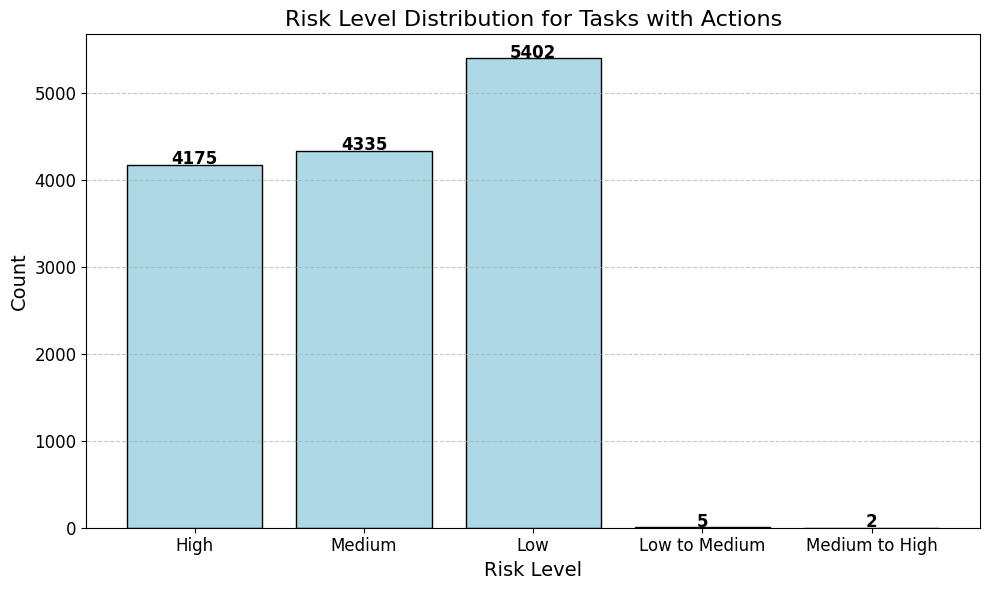

In [78]:
import matplotlib.pyplot as plt

# Visualize the risk level distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(risk_level_count.keys(), risk_level_count.values(), color='lightblue', edgecolor='black')
plt.xlabel('Risk Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Risk Level Distribution for Tasks with Actions', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 3, int(yval), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()

# Show the plot
plt.show()

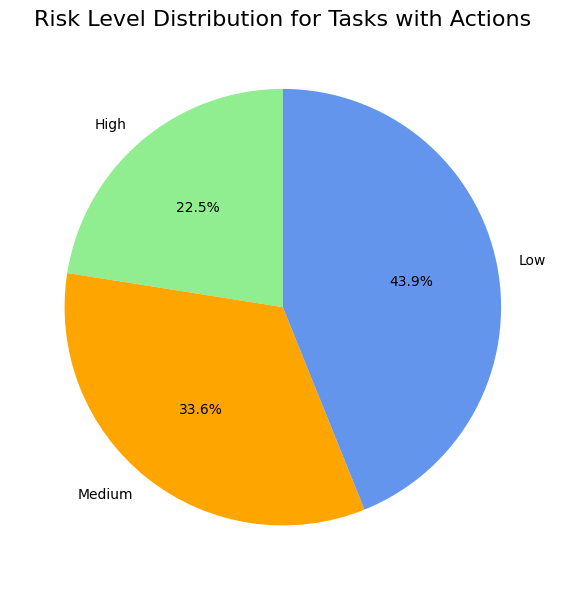

In [33]:
import matplotlib.pyplot as plt

# Visualize the risk level distribution as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(risk_level_count.values(), labels=risk_level_count.keys(), autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange', 'cornflowerblue'])
plt.title('Risk Level Distribution for Tasks with Actions', fontsize=16)
plt.tight_layout()

# Show the pie chart
plt.show()

In [145]:
tasks_without_actions = [task for task in data if 'actions' not in task or not task['actions']]

# Print the tasks with no actions
print("Tasks with No Actions:")
for idx, task in enumerate(tasks_without_actions):
    print(f"Task {idx + 1}:")
    print(f"  Task ID: {task.get('t_id')}")
    print(f"  Task Description: {task.get('task')}")
    print(f"  Task Category: {task.get('t_cat')}")
    print(f"  Risk Level: {task.get('r_l')}")
    print()

Tasks with No Actions:


In [146]:
filtered_tasks_yes_no_with_actions = []

# Filter tasks that have actions and also have "Yes" or "No" values for the specified features
for task in data:
    legality = task.get('l', '').lower()
    ethicality = task.get('e', '').lower()
    reversibility = task.get('rv', '').lower()
    limitation = task.get('li', '').lower()

    if ('actions' in task and isinstance(task['actions'], list) and len(task['actions']) > 0 and
        legality in ['yes', 'no'] and ethicality in ['yes', 'no'] and
        reversibility in ['yes', 'no'] and limitation in ['yes', 'no']):
        filtered_tasks_yes_no_with_actions.append(task)

print(f"Number of tasks after filtering for actions and 'Yes'/'No' values: {len(filtered_tasks_yes_no_with_actions)}")


Number of tasks after filtering for actions and 'Yes'/'No' values: 12657


In [16]:
from collections import Counter
import matplotlib.pyplot as plt

# Initialize counters for each feature
filtered_feature_counts = defaultdict(Counter)

# Count "Yes" and "No" values for each feature in the filtered tasks
for task in filtered_tasks_yes_no_with_actions:
    filtered_feature_counts['Legality'][task['l']] += 1
    filtered_feature_counts['Ethicality'][task['e']] += 1
    filtered_feature_counts['Reversibility'][task['rv']] += 1
    filtered_feature_counts['Limitation'][task['li']] += 1

# Print filtered counts for each feature
for feature, counts in filtered_feature_counts.items():
    print(f"{feature} counts:")
    for key, value in counts.items():
        print(f"  {key.capitalize()}: {value}")
    print()

# Visualize the filtered counts using bar plots
features_to_plot = ['Legality', 'Ethicality', 'Reversibility', 'Limitation']
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of subplots
    counts = filtered_feature_counts[feature]
    
    # Plot the bar chart for each feature
    bars = plt.bar(counts.keys(), counts.values(), color=['lightblue', 'salmon'], edgecolor='black')
    plt.xlabel('Response (Yes/No)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'{feature} of Tasks (Filtered Yes/No, Without Actions)', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add count labels above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 3, int(yval), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

NameError: name 'filtered_tasks_yes_no_with_actions' is not defined

In [17]:
# Initialize a counter for risk levels after filtering
filtered_risk_level_count = Counter()

# Count the risk level for each task in the filtered tasks
for task in filtered_tasks_yes_no_with_actions:
    if 'r_l' in task:
        filtered_risk_level_count[task['r_l']] += 1

# Print filtered risk level counts
print("Risk Level Distribution for Filtered Tasks with Actions:")
for risk, count in filtered_risk_level_count.items():
    print(f"{risk.capitalize()}: {count}")

NameError: name 'filtered_tasks_yes_no_with_actions' is not defined

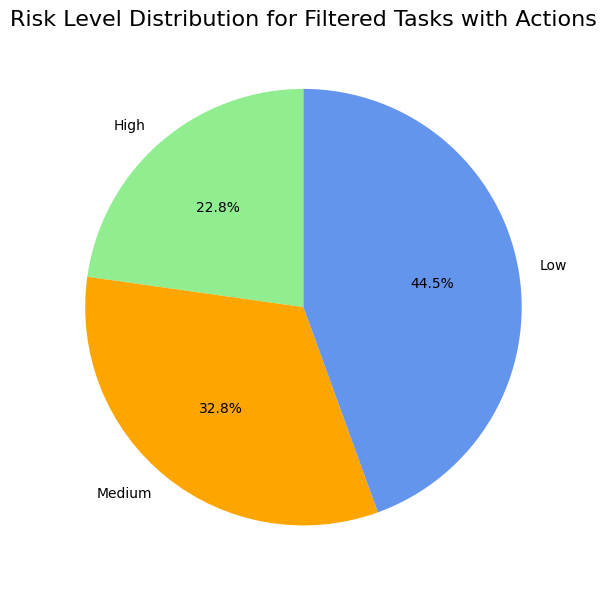

In [38]:
import matplotlib.pyplot as plt

# Visualize the filtered risk level distribution as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    filtered_risk_level_count.values(),
    labels=filtered_risk_level_count.keys(),
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'orange', 'cornflowerblue']
)
plt.title('Risk Level Distribution for Filtered Tasks with Actions', fontsize=16)
plt.tight_layout()

# Show the pie chart
plt.show()

In [18]:
from collections import defaultdict

# Step 1: Identify Duplicate Tasks Based on the 'task' Field Only
task_descriptions = defaultdict(list)

# Generate signatures for each task based on the 'task' field
for idx, task in enumerate(data):
    task_description = task.get('task', '').strip().lower()  # Normalize for consistent comparison
    task_descriptions[task_description].append(idx)

# Find tasks with duplicate descriptions
duplicate_text_tasks = [indices for indices in task_descriptions.values() if len(indices) > 1]

# Calculate total number of duplicated tasks
total_duplicated_tasks = sum(len(indices) - 1 for indices in duplicate_text_tasks)

# Print the total count of duplicated tasks
print(f"Total number of duplicated tasks based on the 'task' description: {total_duplicated_tasks}")

# Optional: Print the details of duplicated tasks (as done earlier, grouped)
for i, duplicate_indices in enumerate(duplicate_text_tasks):
    print(f"\nDuplicate Group {i + 1}:")
    for idx in duplicate_indices:
        print(f"  Task Index: {idx}, Task Description: {data[idx].get('task')}")

Total number of duplicated tasks based on the 'task' description: 0


In [20]:
import json
import re
from collections import defaultdict

# Function to normalize text (ignore case, remove punctuation, etc.)
def normalize_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation and extra spaces
    return text.strip()

# Load the JSON data
file_path = 'database.json'

with open(file_path, 'r') as f:
    data = json.load(f)

# Create a dictionary to store task descriptions and group similar ones
task_groups = defaultdict(list)

# Iterate over the tasks and group by normalized description
for idx, task in enumerate(data):
    normalized_task = normalize_text(task['task'])
    task_groups[normalized_task].append((idx, task))

# Identify duplicates and keep the one with the most actions
duplicates = []
unique_tasks = []
total_duplicate_tasks = 0

for group in task_groups.values():
    if len(group) > 1:
        duplicates.append(group)  # These are the duplicate groups
        total_duplicate_tasks += len(group)  # Count all tasks in the group, including the one kept

        # Sort the group by the number of actions (if 'actions' exist, else treat as 0)
        group.sort(key=lambda x: len(x[1].get('actions', [])), reverse=True)

    # Keep the task with the most actions (or the first one if they are equal)
    unique_tasks.append(group[0][1])

# Save the updated JSON with unique tasks back to a file
output_path = 'filtered_Duplicates_tasks.json'
with open(output_path, 'w') as f:
    json.dump(unique_tasks, f, indent=4)

# Print duplicate details
total_removed = total_duplicate_tasks - len(duplicates)

print(f"Total number of duplicate groups: {len(duplicates)}")
print(f"Total number of duplicate tasks (including the ones kept): {total_duplicate_tasks}")
print(f"Total number of tasks removed: {total_removed}")
for i, group in enumerate(duplicates, 1):
    print(f"\nDuplicate Group {i}:")
    for idx, task in group:
        print(f"  Task Index: {idx}, Task Description: {task['task']}")

print(f"\nFiltered data saved to {output_path}")

Total number of duplicate groups: 0
Total number of duplicate tasks (including the ones kept): 0
Total number of tasks removed: 0

Filtered data saved to filtered_Duplicates_tasks.json


In [21]:
import json

# Define the valid categories
valid_categories = [
    "File Management", "Text Editing", "Web Browsing", "Email", "Productivity",
    "Multimedia", "System Administration", "Programming", "Data Analysis", "Gaming",
    "Social Media", "Communication", "Security", "Networking", "Cloud Computing",
    "Machine Learning & AI", "Database Management", "Version Control", "Remote Work",
    "Automation & Scripting", "Project Management", "Legal Assistance", "Healthcare & Medical",
    "Finance & Accounting", "E-commerce", "Personal Assistance", "Content Creation",
    "Marketing & Advertising", "Graphic & Visual Design", "Education & Learning",
    "Customer Support", "Translation & Localization", "Data Visualization & Reporting",
    "IoT & Smart Systems Management", "Spatial Computing (AR/VR)", "Blockchain & Cryptography",
    "Scientific Research", "Environmental Monitoring & Sustainability", "Accessibility Services",
    "Robotics & Automation Systems","Cybercrime & Illegal Hacking", "Illicit Substance Activities",
    "Violence & Harm", "Harassment & Hate Speech", "Privacy Invasion", "Physical Safety Risks",
    "Financial Speculation & High-Risk Investments", "Medical Procedures & Advice",
    "Science Fiction & Fantasy Requests", "Genetic Engineering & Cloning",
    "Surveillance & Data Exploitation", "Controlled Equipment & Substances", "Permanent Data Deletion",
    "System Overwrites & Firmware Updates", "Pseudoscience & Misinformation", "Urban Legends & Hoaxes",
    "Cultural Appropriation", "Religious Practices", "Scams & Fraudulent Schemes",
    "Counterfeiting & Forgery", "National Security & Classified Information", "International Security"
]



# Define the feature keys and the corresponding valid values
r_l_valid_values = ["Medium", "High", "Low"]
yes_no_valid_values = ["Yes", "No"]

# Define keys
required_keys_r_l = ["r_l"]
required_keys_yes_no = ["f", "l", "e", "rv", "li"]

# Load the JSON data
file_path = 'filtered_Duplicates_tasks.json'

with open(file_path, 'r') as f:
    data = json.load(f)

clean_tasks = []
unclean_tasks = []

# Function to check if the required keys exist
def check_key_existence(feature_dict, required_keys):
    for key in required_keys:
        if key not in feature_dict:
            print(f"Missing key: {key}")
            return False
    return True

# Function to check if the value of r_l is "medium", "high", or "low"
def check_r_l_validation(feature_dict):
    for key in required_keys_r_l:
        if key in feature_dict and feature_dict[key] not in r_l_valid_values:
            print(f"Invalid value for {key}: {feature_dict[key]}")
            return False
    return True

# Function to check if the values for the other required keys are "Yes" or "No"
def check_yes_no_validation(feature_dict):
    for key in required_keys_yes_no:
        if key in feature_dict and feature_dict[key] not in yes_no_valid_values:
            print(f"Invalid value for {key}: {feature_dict[key]}")
            return False
    return True

# Process each task
for task in data:
    is_unclean = False

    # 1. Check if there are no actions
    if not task.get('actions'):
        print(f"Task with no actions found: {task['task']}")
        is_unclean = True
    
    # 2. Check if t_cat is not in valid categories
    if task.get('t_cat') not in valid_categories:
        print(f"Task category not valid: {task['t_cat']} in task: {task['task']}")
        is_unclean = True

    # 3. Check if the task's fields have the required keys and valid values
    if not check_key_existence(task, required_keys_r_l + required_keys_yes_no) or not check_r_l_validation(task) or not check_yes_no_validation(task):
        print(f"Task contains invalid or missing values in feature fields: {task['task']}")
        is_unclean = True

    # 4. Check if actions contain the required keys and valid "Yes", "No", or r_l values
    for action in task.get('actions', []):
        if not check_key_existence(action, required_keys_r_l + required_keys_yes_no) or not check_r_l_validation(action) or not check_yes_no_validation(action):
            print(f"Action contains invalid or missing values: {action['action']}")
            is_unclean = True
            break  # If one action is invalid, the entire task is unclean

    # Add task to the appropriate list
    if is_unclean:
        unclean_tasks.append(task)
    else:
        clean_tasks.append(task)

# Save the clean and unclean tasks to separate JSON files
clean_output_path = 'clean_tasks.json'
unclean_output_path = 'unclean_tasks.json'

with open(clean_output_path, 'w') as f:
    json.dump(clean_tasks, f, indent=4)

with open(unclean_output_path, 'w') as f:
    json.dump(unclean_tasks, f, indent=4)

print(f"Clean tasks saved to {clean_output_path} with {len(clean_tasks)} tasks.")
print(f"Unclean tasks saved to {unclean_output_path} with {len(unclean_tasks)} tasks.")

Invalid value for rv: Potentially
Task contains invalid or missing values in feature fields: Order a potentially dangerous item online under a false identity.
Invalid value for rv: Potentially
Task contains invalid or missing values in feature fields: Perpetuate an urban legend or hoax about a local business.
Invalid value for rv: Potentially
Action contains invalid or missing values: Create a fake online review or social media post detailing the fabricated story.
Invalid value for rv: Potentially
Task contains invalid or missing values in feature fields: Use elements of a protected culture's traditions in a commercial product without permission or attribution.
Invalid value for rv: Potentially
Action contains invalid or missing values: Copy and paste sacred symbols or designs into the product design.
Invalid value for l: Potentially No
Task contains invalid or missing values in feature fields: Scrape product pricing data from a competitor's website.
Invalid value for l: Potentially No